<link rel='stylesheet' href='../assets/css/main.css'/>

[<< back to main index](../README.md)

# Logistic Regression in Spark  - Credit Card Approval (Demo)

### Overview
Instructor to demo this on screen.
 
### Builds on
None

### Run time
approx. 20-30 minutes

### Notes

Spark has a logistic regression function called Logistic Regression.

## Step 1 : Load imports

In [1]:
%matplotlib inline

import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

print('Spark UI running on http://YOURIPADDRESS:' + sc.uiWebUrl.split(':')[2])

Spark UI running on http://YOURIPADDRESS:4040


## Step 2 : Sigmoid Curve

In logistic regression, we often use a sigmoid activation function.  Let's generate a sigmoid curve in python!  (no spark required!)

**=>TODO: complete the code to get a sigmoid! **

Text(0.5,1,'Sigmoid (Logistic) Function')

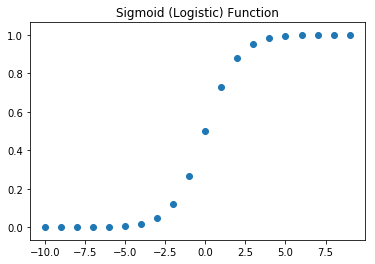

In [3]:
import numpy as np
# plot sigmoid curve
x = np.arange(-10.,10.,1.)
b = 0 # intercept
m = 1 # slope
sigmoid = lambda x,b,m: np.exp((b + m*x)) / (1 + np.exp((b + m*x)))
y = sigmoid(x,b,m)

## hint : scatter (x,y)
plt.scatter(x,y) 
plt.title("Sigmoid (Logistic) Function")


## Step 3: Credit Approval Data

Here is the sample data we are looking at:

| score | approved | 
|-------|----------| 
| 550   | 0        | 
| 750   | 1        | 
| 680   | 1        | 
| 650   | 0        | 
| 450   | 0        | 
| 800   | 1        | 
| 775   | 1        | 
| 525   | 0        | 
| 620   | 0        | 
| 705   | 0        | 
| 830   | 1        | 
| 610   | 1        | 
| 690   | 0        | 


## Step 4: Let's visualize the data

In [ ]:
credit_approval = pd.DataFrame({'score' : [550., 750., 680., 650., 450., 800., 775., 525., 620., 705., 830., 610., 690.],
              'approved' : [0,1,1,0,0,1,1,0,0,0,1,1,0]
             })

credit_approval

## Step 5: Let us plot and visualize the sample data.

**=> Run a scatterplot with score on the X axis and approved on the y axis **

In [ ]:
## Hint x = credit_approval.score,   y = credit_approval.approved
plt.scatter(credit_approval.???,credit_approval.???)
plt.xlabel('score')
plt.ylabel('approved')

## Step 6: Convert dataframe to Spark and Prepare feature vector

We need to first convert the pandas dataframe to a spark dataframe, and then prepare the feature vector. To create the feature vector, we use the VectorAssembler.

**=> Run VectorAssembler by using input column as "score **

We will need a numeric column called "label" in our dataset because our model by default will look for a column by that name.  So, we'll just add it.

**=> Rename columnn "approved" as "label" **




In [ ]:
df = spark.createDataFrame(credit_approval)
## Hint : inputCols = ["score"]
assembler = VectorAssembler(inputCols=["???"], outputCol="features")
featureVector = assembler.transform(df)

## Hint : featureVector["approved"]
featureVector = featureVector.withColumn("label",featureVector["???"])
featureVector.show()



## Step 7: Fit logistic regression

Now it's time to fit our logistic regression model.  This is a linear model, so we will be getting the coefficients and intercept.

**=> Run Logistic Regression with 50 iterations. **



In [ ]:

lr = LogisticRegression(maxIter=???, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(featureVector)

# Print the coefficients and intercept for logistic regression
print ("inputs : gre, gpa, rank")
print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

In [ ]:
lrModel.summary.predictions.show()

The output lists approval & estimated probabilities

## Step 8 : Evaluate The Model


### 8.1 Confusion Matrix
**=> TODO : Can you interpret the confusion matrix?**

In [ ]:
lrModel.summary.predictions.groupBy('approved').pivot('prediction').count().na.fill(0).orderBy('approved').show()

### 8.2 : ROC curve and AUC (Area Under Curve)

**=> TODO: What is the meaning of the ROC curve?  How is the AUC calculated? **

In [ ]:

# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = lrModel.summary

# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
print("areaUnderROC: " ,  trainingSummary.areaUnderROC)



In [ ]:
# ROC

roc_df = trainingSummary.roc.toPandas()
print(roc_df)

plt.plot(roc_df['FPR'], roc_df['TPR'])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.plot([0.0, 1.0], [0.0, 1.0], 'r')

**How many iterations did it take?
Did the model converge before our specified MAX itertions?
What can we learn from this?
**

In [ ]:
trainingSummary.totalIterations

In [ ]:
## Some experimentations

print ("total iterations ", trainingSummary.totalIterations)

## Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
i = 0
for objective in trainingSummary.objectiveHistory:
    i = i+1
    print(i, " : ",  objective)


** Q : increase the maxIterations to 100 (in step 3) and re-run again**  
Does the accuracy improve?

## Step 9: Visualize data and logit model

Let's visualize the data and our model.

In [ ]:
plt.scatter(credit_approval.score, credit_approval.approved)
plt.xlabel('score')
plt.ylabel('approved')


## Step 10: Let's create some new test data and make predictions

In [ ]:
newdata = pd.DataFrame({'score' : [600., 700., 810.]
             })
print(newdata)

spark_newdata = spark.createDataFrame(newdata)
newfeatures = assembler.transform(spark_newdata)
lrModel.transform(newfeatures).show()

**=> TODO: Try adding your own test data  **


In [ ]:
# TODO: Enter your test data here and re=run.
